<a href="https://colab.research.google.com/github/M-Awwab-Khan/Dog-vs-Cat-Classification-Transfer-Learning/blob/main/Dog_vs_Cat_Classification_Mobilenet_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from zipfile import ZipFile
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
import tensorflow_hub as hub
import tensorflow as tf

# Loading the Data

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [6]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:27<00:00, 31.5MB/s]
100% 812M/812M [00:27<00:00, 30.8MB/s]


In [7]:
!unzip 'dogs-vs-cats.zip'

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip 'train.zip'

In [9]:
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


# Resizing Images

In [11]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [12]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(25000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

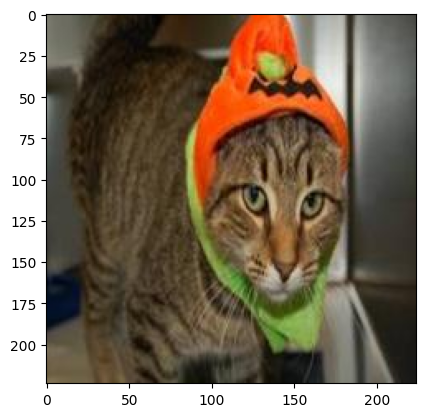

In [14]:
# display resized cat image
img = mpimg.imread('/content/image_resized/cat.4119.jpg')
plt.imshow(img)

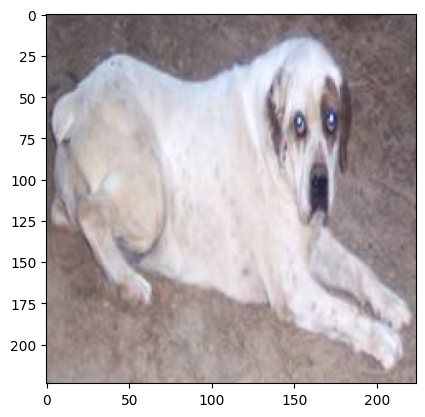

In [15]:
# display resized dog image
img = mpimg.imread('/content/image_resized/dog.11382.jpg')
plt.imshow(img)